In [1]:
import sys
sys.path.insert(0, './utils')

import random
import time
import matplotlib.pyplot as plt

from genetic import fitness, selection
from knapsack import *

In [2]:
class Genes():
    def __init__(self, v, w, W, G = 10):
        self.v = v
        self.w = w
        self.n = len(v)
        self.W = W
        self.G = G
        self.generation = [self.generate() for _ in range(self.G)]
        
    def literal(self, D):
        string = ""
        for element in D:
            string += str(element)
        return string

    def numerical(self, string):
        D = []
        for element in string:
            D.append(int(element))
        return D
    
    def reset(self):
        self.generation = [self.generate() for _ in range(self.G)]
    
    def generate(self):
        string = ""
        for i in range(self.n):
            string += str(random.randint(0,1))
        return string
    
    def update(self):
        self.generation = selection(self.generation, self.v, self.w, self.W, self.G)
        self.fitness = [fitness(d, self.v, self.w, self.W) for d in self.generation]
        
    def infinity(self, boolean = True):
        try:
            while True:
                if boolean:
                    for d in self.generation:
                        print("{0}, {1}".format(d, fitness(d, self.v, self.w, self.W)))  
                    print("-------")
                    self.update()
                else:
                    self.update()

        except:
            if boolean:
                print("SOLUTION GENERATED!")

In [6]:
v = [20, 5, 10, 40, 15, 25, 30, 50, 10, 30, 40]
w = [ 1, 2,  3,  8,  7,  4,  1,  2,  2,  8,  1]
W = 12
G = 10

In [7]:
Knapsack(v, w, W) # Compute the exact maximum value

175

CPU times: user 466 ms, sys: 13.3 ms, total: 479 ms
Wall time: 466 ms


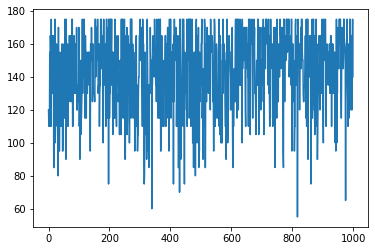

In [9]:
%%time
genes = Genes(v, w, W, G)
rounds = 1000
maximum = []
for _ in range(rounds):
    genes.reset()
    genes.infinity(False)
    maximum.append(max(genes.fitness))
    
plt.plot(maximum)